In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import datetime
import glob
%matplotlib inline

#set default plot characterstics and colors
from matplotlib import rcParams

In [2]:
summer2015 = pd.read_csv('C:/Users/Sammauel/Documents/Github/citi-bike-data/summer2015/summer_2015_with_roundtrip.csv')
summer2015.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,roundtrip
0,0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,0
1,1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,0
2,2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,0
3,3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,0
4,4,690,6/1/2015 0:03,6/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,410,Suffolk St & Stanton St,40.720664,-73.985180,20857,Subscriber,1976.0,1,0


In [3]:
summer2016 = pd.read_csv('C:/Users/Sammauel/Documents/Github/citi-bike-data/summer2016/summer_2016_with_roundtrip.csv')
summer2016.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,roundtrip
0,0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,0
1,1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,0
2,2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,0
3,3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,0
4,4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,0


In [4]:
cleandata = pd.read_csv('C:/Users/Sammauel/Documents/DataScience/Citibike/cleandata/testing_clean.csv')
cleandata.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,gender,age,day of week,minute,roundtrip
3742895,13,8/29/2016 14:51:22,8/29/2016 15:05:00,457,Broadway & W 58 St,40.766953,-73.981693,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,2,50,0,891,0
3742896,8,8/29/2016 14:54:48,8/29/2016 15:03:25,457,Broadway & W 58 St,40.766953,-73.981693,305,E 58 St & 3 Ave,40.760958,-73.967245,1,57,0,894,0
3742897,4,8/29/2016 15:33:18,8/29/2016 15:37:20,457,Broadway & W 58 St,40.766953,-73.981693,469,Broadway & W 53 St,40.763441,-73.982681,2,28,0,933,0
3742898,9,8/29/2016 15:47:35,8/29/2016 15:57:04,457,Broadway & W 58 St,40.766953,-73.981693,479,9 Ave & W 45 St,40.760193,-73.991255,1,43,0,947,0
3742899,37,8/29/2016 16:25:46,8/29/2016 17:03:12,457,Broadway & W 58 St,40.766953,-73.981693,368,Carmine St & 6 Ave,40.730386,-74.002150,2,32,0,985,0


Our summer 2015 data set has 2674200 rides, of which 23.99% (641657) are female and 75.89% (2029573) are male
Our testing summer 2016 data set has 3742900 rides, of which 25.23% (944150) are female and 74.50% (2788627) are male


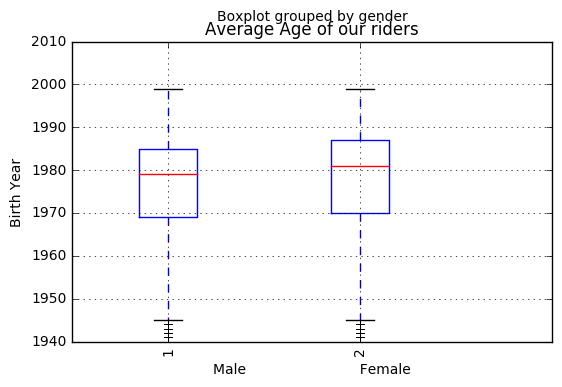

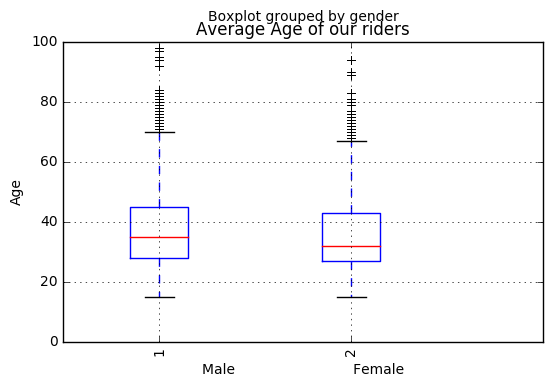

In [6]:
##Change to plt.bar

num_rides = len(summer2015)
num_female = len(summer2015[summer2015['gender'] == 2])
percent_female = (num_female / num_rides) * 100
num_male = len(summer2015[summer2015['gender'] == 1])
percent_male = (num_male / num_rides) * 100
print(("Our summer 2015 data set has %d rides, " +
      "of which %.2f%% (%d) are female and %.2f%% (%d) are male") % (
        len(summer2015), percent_female, num_female, percent_male, num_male))

#num_rides1 = len(summer2016)
#num_female1 = len(summer2016[summer2016['gender'] == 2])
#percent_female1 = (num_female1 / num_rides1) * 100
#num_male1 = len(summer2016[summer2016['gender'] == 1])
#percent_male1 = (num_male1 / num_rides1) * 100
#print(("Our summer 2016 data set has %d rides, " +
#      "of which %.2f%% (%d) are female and %.2f%% (%d) are male") % (
#        len(summer2016), percent_female1, num_female1, percent_male1, num_male1))

num_rides2 = len(cleandata)
num_female2 = len(cleandata[cleandata['gender'] == 2])
percent_female2 = (num_female2 / num_rides2) * 100
num_male2 = len(cleandata[cleandata['gender'] == 1])
percent_male2 = (num_male2 / num_rides2) * 100
print(("Our testing summer 2016 data set has %d rides, " +
      "of which %.2f%% (%d) are female and %.2f%% (%d) are male") % (
        len(cleandata), percent_female2, num_female2, percent_male2, num_male2))


summer2015.boxplot('birth year', by = 'gender', rot = 90)
plt.xlim(1.5,4)
plt.ylim(1940,2010)
plt.title('Average Age of our riders')
plt.ylabel('Birth Year')
plt.xlabel('Male                          Female')
plt.show()


cleandata.boxplot('age', by = 'gender', rot = 90)
plt.xlim(1.5,4)
plt.ylim(0,100)
plt.title('Average Age of our riders')
plt.ylabel('Age')
plt.xlabel('Male                           Female')
plt.show()

In [10]:
#plt.scatter(cleandata['start station latitude'], cleandata['start station longitude'])
#plt.title('Location of Stations')
#plt.xlabel('Latitude')
#plt.ylabel('Longitude')
#plt.show()
#df.loc[df['A'] == 'foo'])
cleandata.loc[cleandata['start station name'] == 'West St & Chambers St']

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,gender,age,day of week,minute,roundtrip
545,3,6/1/2016 04:34:52,6/1/2016 04:38:21,426,West St & Chambers St,40.717548,-74.013221,79,Franklin St & W Broadway,40.719116,-74.006667,1,39,2,274,0
676,12,6/1/2016 05:37:22,6/1/2016 05:49:24,426,West St & Chambers St,40.717548,-74.013221,250,Lafayette St & Jersey St,40.724561,-73.995653,1,24,2,337,0
918,11,6/1/2016 06:03:11,6/1/2016 06:14:21,426,West St & Chambers St,40.717548,-74.013221,151,Cleveland Pl & Spring St,40.722104,-73.997249,1,37,2,363,0
928,10,6/1/2016 06:03:47,6/1/2016 06:14:44,426,West St & Chambers St,40.717548,-74.013221,151,Cleveland Pl & Spring St,40.722104,-73.997249,1,43,2,363,0
1221,23,6/1/2016 06:20:47,6/1/2016 06:44:16,426,West St & Chambers St,40.717548,-74.013221,173,Broadway & W 49 St,40.760683,-73.984527,2,37,2,380,0
1383,29,6/1/2016 06:28:49,6/1/2016 06:57:50,426,West St & Chambers St,40.717548,-74.013221,524,W 43 St & 6 Ave,40.755273,-73.983169,1,37,2,388,0
1920,9,6/1/2016 06:47:05,6/1/2016 06:56:33,426,West St & Chambers St,40.717548,-74.013221,415,Pearl St & Hanover Square,40.704718,-74.009260,2,39,2,407,0
2059,5,6/1/2016 06:51:06,6/1/2016 06:56:15,426,West St & Chambers St,40.717548,-74.013221,387,Centre St & Chambers St,40.712733,-74.004607,1,42,2,411,0
2347,12,6/1/2016 06:59:50,6/1/2016 07:11:54,426,West St & Chambers St,40.717548,-74.013221,225,W 14 St & The High Line,40.741951,-74.008030,2,46,2,419,0
2557,19,6/1/2016 07:06:08,6/1/2016 07:26:08,426,West St & Chambers St,40.717548,-74.013221,151,Cleveland Pl & Spring St,40.722104,-73.997249,1,24,2,426,0


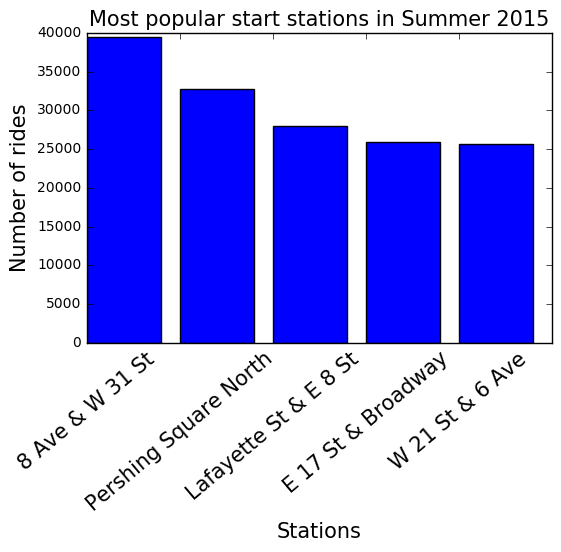

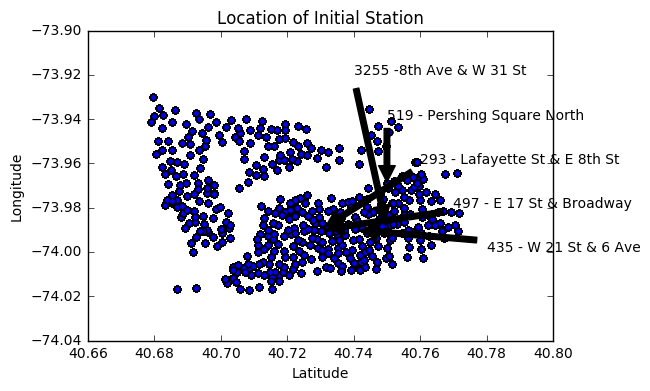

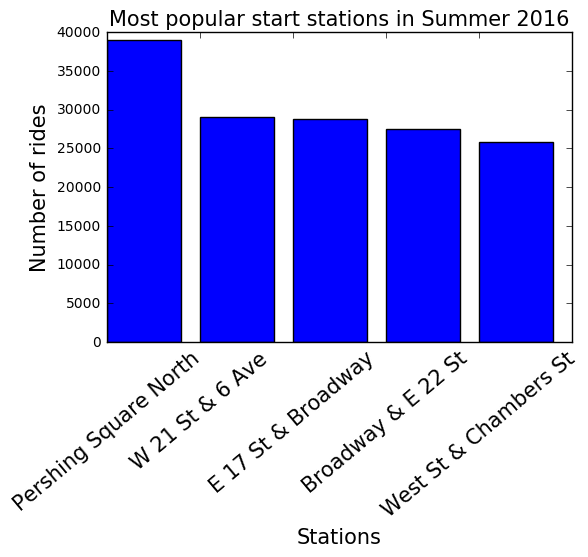

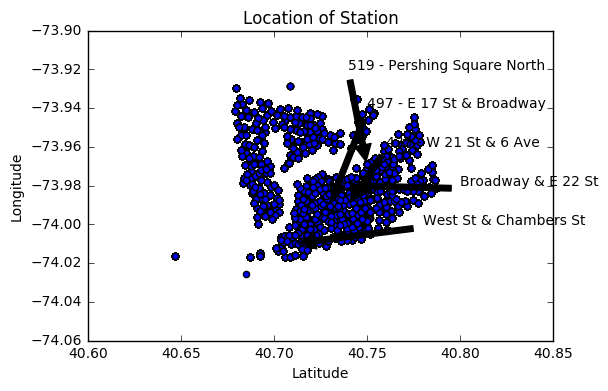

In [14]:
start_stations = summer2015.groupby('start station name')['start station id'].count().reset_index()
start_stations.columns = ['Start Station', 'Count']
start_stations = start_stations.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(start_stations))), start_stations['Count'], 
            tick_label=start_stations['Start Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular start stations in Summer 2015', fontsize = 15)
plt.show()

#stationID = 3255
stationNum = '3255'
stationName = '8th Ave & W 31 St'
plt.scatter(summer2015['start station latitude'], summer2015['start station longitude'])
plt.title('Location of Initial Station')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.annotate('3255 -8th Ave & W 31 St', xy=(40.75, -73.99), xytext=(40.74, -73.92),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('519 - Pershing Square North', xy=(40.75, -73.97), xytext=(40.75, -73.94),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('293 - Lafayette St & E 8th St', xy=(40.73, -73.99), xytext=(40.76, -73.96),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('497 - E 17 St & Broadway', xy=(40.73, -73.99), xytext=(40.77, -73.98),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('435 - W 21 St & 6 Ave', xy=(40.74, -73.99), xytext=(40.78, -74),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

start_stations1 = summer2016.groupby('start station name')['start station id'].count().reset_index()
start_stations1.columns = ['Start Station', 'Count']
start_stations1 = start_stations1.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(start_stations1))), start_stations1['Count'], 
            tick_label=start_stations1['Start Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular start stations in Summer 2016', fontsize = 15)
plt.show()

#stationID = 519
stationNum1 = '519'
stationName1 = 'Pershing Square North'
plt.scatter(summer2016['start station latitude'], summer2016['start station longitude'])
plt.title('Location of Station')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.annotate('519 - Pershing Square North', xy=(40.75, -73.97), xytext=(40.74, -73.92),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('497 - E 17 St & Broadway', xy=(40.73, -73.99), xytext=(40.75, -73.94),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('435 - W 21 St & 6 Ave', xy=(40.74, -73.99), xytext=(40.76, -73.96),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Broadway & E 22 St', xy = (40.74,-73.98), xytext=(40.80, -73.98),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('West St & Chambers St', xy = (40.71,-74.01), xytext=(40.78, -74),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

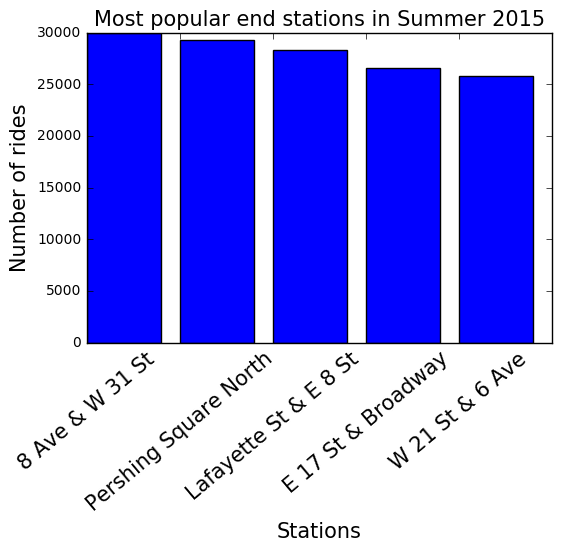

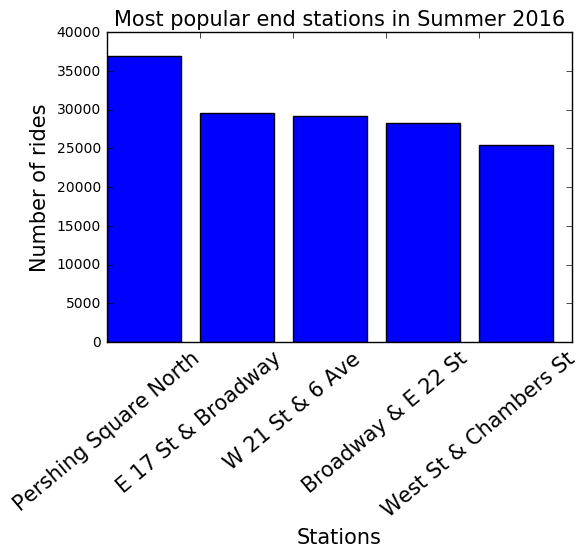

In [16]:
end_stations = summer2015.groupby('end station name')['end station id'].count().reset_index()
end_stations.columns = ['End Station', 'Count']
end_stations = end_stations.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(end_stations))), end_stations['Count'], 
            tick_label=end_stations['End Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular end stations in Summer 2015', fontsize = 15)
plt.show()

end_stations1 = summer2016.groupby('end station name')['end station id'].count().reset_index()
end_stations1.columns = ['End Station', 'Count']
end_stations1 = end_stations1.sort_values(by='Count', ascending=False).head()

# create bar graph
plt.bar(list(range(len(end_stations1))), end_stations1['Count'], 
            tick_label=end_stations1['End Station'])
plt.xticks(rotation=40, fontsize = 15)
plt.xlabel('Stations', fontsize = 15)
plt.ylabel('Number of rides', fontsize = 15)
plt.title('Most popular end stations in Summer 2016', fontsize = 15)
plt.show()

Next is taking the week of July 4th and looking into that. I also want to attempt some linear regression(suggested by harris).

In [50]:
cleandata['roundtrip'].value_counts()
#cleandataRT = cleandata.groupby('start station name')['roundtrip']
#cleandataRT.head()

0    3676761
1      66139
Name: roundtrip, dtype: int64

In [51]:
cleandata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,gender,age,day of week,minute,roundtrip
0,24,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,1,43,2,0,0
1,3,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,1,48,2,0,0
2,5,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,1,26,2,0,0
3,18,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,1,24,2,0,0
4,3,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,1,26,2,0,0


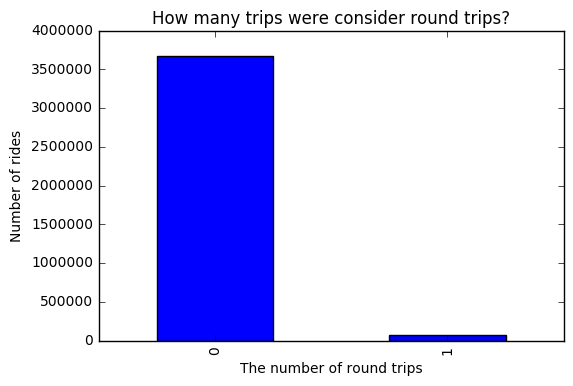

In [66]:
from collections import Counter
test = Counter(cleandata['roundtrip'])
roundtrips = pd.DataFrame.from_dict(test, orient='index')
roundtrips.plot(kind='bar', legend = False, color = 'blue')
plt.title('How many trips were consider round trips?')
plt.ylabel('Number of rides')
plt.xlabel('The number of round trips')

In [68]:
'''
plt.annotate('519 - Pershing Square North', xy=(40.75, -73.97), xytext=(40.74, -73.92),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('497 - E 17 St & Broadway', xy=(40.73, -73.99), xytext=(40.75, -73.94),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('435 - W 21 St & 6 Ave', xy=(40.74, -73.99), xytext=(40.76, -73.96),
            arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Broadway & E 22 St', xy = (40.74,-73.98), xytext=(40.80, -73.98),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('West St & Chambers St', xy = (40.71,-74.01), xytext=(40.78, -74),
            arrowprops=dict(facecolor='black', shrink=0.05))
'''

"\nplt.annotate('519 - Pershing Square North', xy=(40.75, -73.97), xytext=(40.74, -73.92),\n            arrowprops=dict(facecolor='black', shrink=0.05),)\nplt.annotate('497 - E 17 St & Broadway', xy=(40.73, -73.99), xytext=(40.75, -73.94),\n            arrowprops=dict(facecolor='black', shrink=0.05),)\nplt.annotate('435 - W 21 St & 6 Ave', xy=(40.74, -73.99), xytext=(40.76, -73.96),\n            arrowprops=dict(facecolor='black', shrink=0.05),)\nplt.annotate('Broadway & E 22 St', xy = (40.74,-73.98), xytext=(40.80, -73.98),\n            arrowprops=dict(facecolor='black', shrink=0.05))\nplt.annotate('West St & Chambers St', xy = (40.71,-74.01), xytext=(40.78, -74),\n            arrowprops=dict(facecolor='black', shrink=0.05))\n"

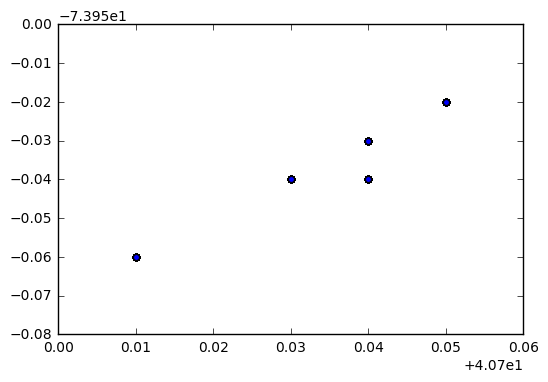

In [72]:
#Testing out a scatter plot for location of popular stations
x = [40.75,40.73,40.74,40.74,40.71]
y = [-73.97,-73.99,-73.99,-73.98,-74.01]

plt.scatter(x*100,y*100)
plt.show()